# Importing Libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,median_absolute_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Handling Null values

In [3]:
# Before Handling
print('Dataset Before Handling NULL  : ',sum(df.isna().sum()))
print(df.shape)

Dataset Before Handling NULL  :  7829
(1460, 81)


In [4]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
# Drop columns with more than 30% missing values
threshold = 0.3
df = df.dropna(thresh=len(df) * threshold, axis=1)

In [6]:
# Fill missing numerical values with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [7]:
# Fill missing categorical values with mode
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "O" else x)

In [8]:
# After Handling
print('Dataset After  Filling NULL  : ',sum(df.isna().sum()))
print(df.shape)

Dataset After  Filling NULL  :  0
(1460, 77)


# Handling Outliers

In [9]:
# Handle outliers using IQR for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Encoding Categorical Data

In [10]:
# Label Encoding for categorical data
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [11]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.000000,8450.0,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.000000,9600.0,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.000000,11250.0,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.000000,9550.0,1,0,3,0,0,...,0,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.000000,14260.0,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0
5,6,50,3,85.000000,14115.0,1,0,3,0,4,...,0,0,0,0,0,10,2009,8,4,143000.0
6,7,20,3,75.000000,10084.0,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,307000.0
7,8,60,3,70.049958,10382.0,1,0,3,0,0,...,0,0,0,0,0,11,2009,8,4,200000.0
8,9,50,4,51.000000,6120.0,1,3,3,0,4,...,0,0,0,0,0,4,2008,8,0,129900.0
9,10,145,3,50.000000,7420.0,1,3,3,0,0,...,0,0,0,0,0,1,2008,8,4,118000.0


# Calculate correlation with the target variable

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def drop_low_correlation_columns(df, target_column, threshold=0.2):

    # Calculate correlation with the target variable
    correlation = df.corr()[target_column].abs()

    # Set a correlation threshold
    low_correlation_columns = correlation[correlation < threshold].index

    # Drop columns with low correlation
    df.drop(low_correlation_columns, axis=1, inplace=True)

    return df

# Drop low-correlation columns automatically
df = drop_low_correlation_columns(df, "SalePrice")


# Spliting Dataset

In [13]:
# Split the data into features (X) and target variable (y)
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [14]:
# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Model

In [15]:
# Train a linear regression model
#k = 8  # You can choose the value of k
#model = KNeighborsRegressor(n_neighbors=k)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Testing Model

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


# Calculate Accuracy

In [17]:
print ('Mean_AE is:', mean_absolute_error(y_test, y_pred))
print ('MSE is:', mean_squared_error(y_test, y_pred))
print ('RMSE is:', sqrt(mean_squared_error(y_test, y_pred)))
print('Median_AE :',median_absolute_error(y_test , y_pred))
print("R-squared (R2) is",r2_score(y_test,y_pred))
print('------------------------------------------------')
accuracy = model.score(X_test_scaled, y_test)
print(f'Model Accuracy: {accuracy*100}')


Mean_AE is: 16413.1243866879
MSE is: 476536077.4051774
RMSE is: 21829.706305976208
Median_AE : 13712.745169494912
R-squared (R2) is 0.9025339100204982
------------------------------------------------
Model Accuracy: 90.25339100204982


# Visualization

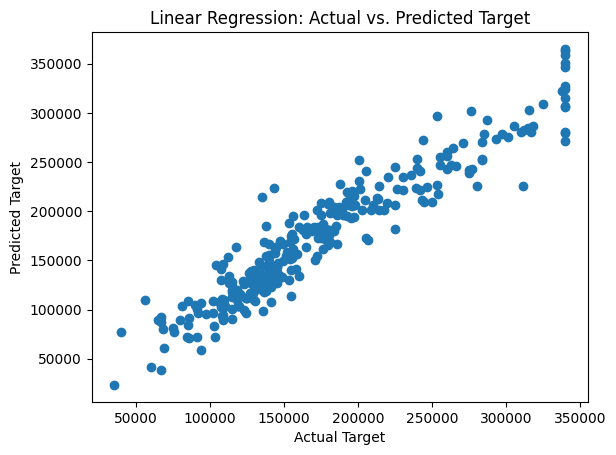

In [18]:
# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Linear Regression: Actual vs. Predicted Target")
plt.show()

# Loss Curve

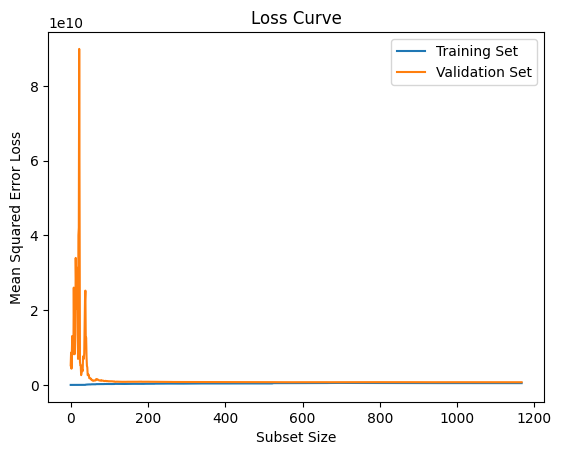

In [19]:
# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Create a linear regression model
model = LinearRegression()

# Train the model on different subsets and collect mean squared error
mse_values_train = []
mse_values_val = []

for i in range(1, split_index + 1):
    model.fit(X_train[:i], y_train[:i])

    # Calculate mean squared error for training set
    y_train_preds = model.predict(X_train[:i])
    mse_train = mean_squared_error(y_train[:i], y_train_preds)
    mse_values_train.append(mse_train)

    # Calculate mean squared error for validation set
    y_val_preds = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_preds)
    mse_values_val.append(mse_val)

# Plot the loss curves
plt.plot(mse_values_train, label='Training Set')
plt.plot(mse_values_val, label='Validation Set')
plt.title('Loss Curve')
plt.xlabel('Subset Size')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()